## 서연 캐글 4회차 과제

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns

### GROUPBY 함수 복습 

1) 해당 dataframe을 이용하여 부산에 평균 quantity를 추출하는 코드를 작성하시오 (밑에 그림처럼 나머지 column이 나타나면 안됨) 
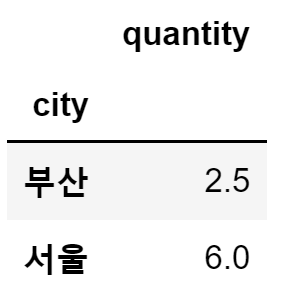

In [25]:
df = pd.DataFrame({
    'city': ['부산', '부산', '부산', '부산', '서울', '서울', '서울'],
    'fruits': ['apple', 'orange', 'banana', 'banana', 'apple', 'apple', 'banana'],
    'price': [100, 200, 250, 300, 150, 200, 400],
    'quantity': [1, 2, 3, 4, 5, 6, 7]
})

In [36]:
df[['city', 'quantity']].groupby(['city']).mean()

,quantity
city,
부산,2.5
서울,6.0


2) 도시별, 과일별 총 가격과 총 물량을 나타내는 테이블 만들기 (밑에 그림과 같이)
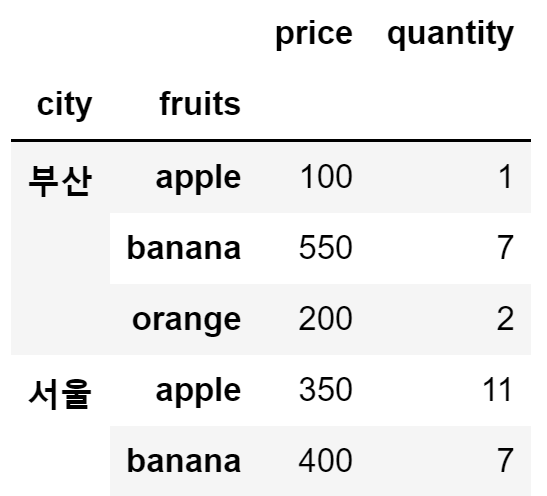

In [39]:
df[['city', 'fruits', 'price','quantity']].groupby(['city', 'fruits']).sum()

price  quantity
city fruits                 
부산   apple     100         1
     banana    550         7
     orange    200         2
서울   apple     350        11
     banana    400         7

3) price x quantity를 한 'total' 이라는 새로운 column 만들기
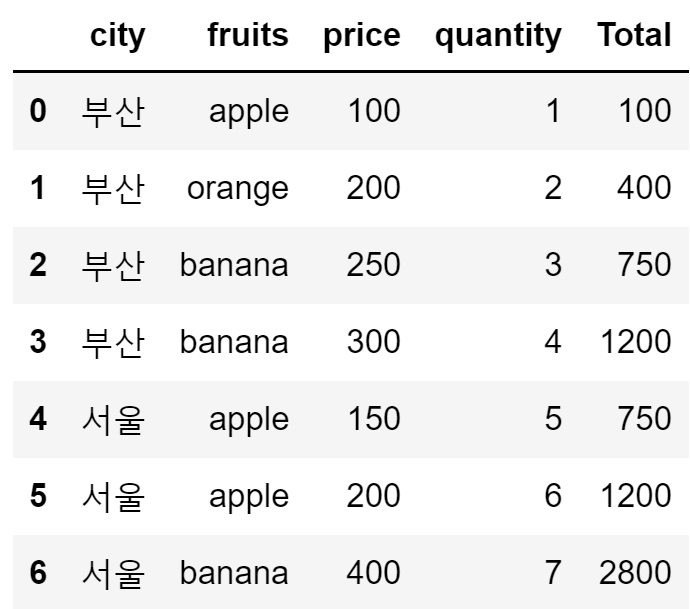

In [41]:
#df['새로운 column'] = 값
df['total'] = df['price']*df['quantity']
df

,city,fruits,price,quantity,total
0,부산,apple,100,1,100
1,부산,orange,200,2,400
2,부산,banana,250,3,750
3,부산,banana,300,4,1200
4,서울,apple,150,5,750
5,서울,apple,200,6,1200
6,서울,banana,400,7,2800


4) 해당 코드를 적용했을때 왜 output이 출력 안될까요? <br>
https://rfriend.tistory.com/383 링크 참고

In [26]:
df.groupby('price')

## Dataframe handling 문법 복습 (loc, df[], df[[]] 등)

1) df에서 city 가 '부산'인 데이터만 출력하기
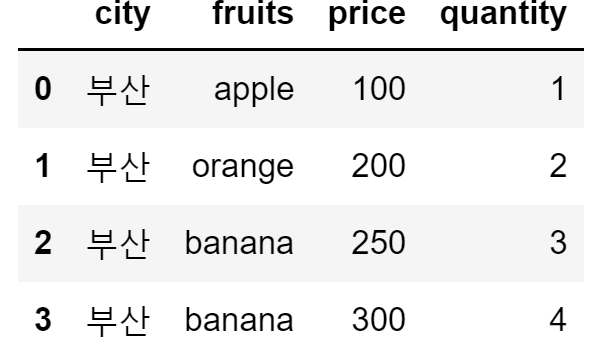

In [47]:
#df[df []] 을 이용한 방법
#df[condition]
df[df['city']=='부산']

,city,fruits,price,quantity,total
0,부산,apple,100,1,100
1,부산,orange,200,2,400
2,부산,banana,250,3,750
3,부산,banana,300,4,1200


In [50]:
# loc 함수를 이용한 방법
df.loc[(df["city"] == '부산')]

,city,fruits,price,quantity,total
0,부산,apple,100,1,100
1,부산,orange,200,2,400
2,부산,banana,250,3,750
3,부산,banana,300,4,1200


In [58]:
df[(df['price'] >= 150) & (df['quantity'] >= 3)]

,city,fruits,price,quantity,total
2,부산,banana,250,3,750
3,부산,banana,300,4,1200
4,서울,apple,150,5,750
5,서울,apple,200,6,1200
6,서울,banana,400,7,2800


2) df에서 'city'와 'price', 'quantity' 만 있는 새로운 테이블을 new_table로 저장하기
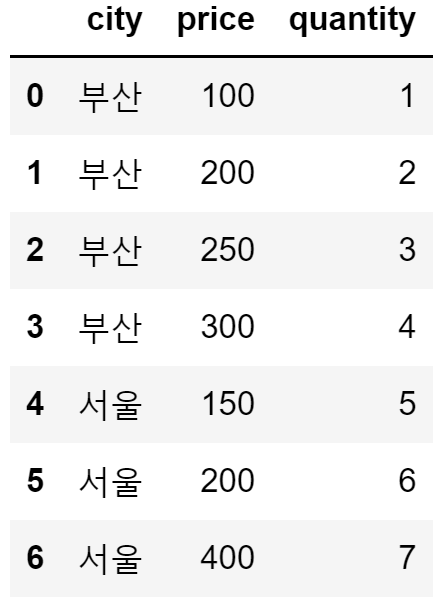

In [59]:
# df.drop을 이용한 방법
df.drop(columns=['fruits', 'total']) # 빼고 싶은 column이 conditional

,city,price,quantity
0,부산,100,1
1,부산,200,2
2,부산,250,3
3,부산,300,4
4,서울,150,5
5,서울,200,6
6,서울,400,7


In [61]:
# df [ []] 을 이용한 방법
df[['city', 'price', 'quantity']] # conditional이 원하는 column 그 자체

,city,price,quantity
0,부산,100,1
1,부산,200,2
2,부산,250,3
3,부산,300,4
4,서울,150,5
5,서울,200,6
6,서울,400,7


## 시각화 방법 복습

In [31]:
train_data = pd.read_csv("train.csv")

1) sns.factorplot을 이용해서 밑에 그래프 만들기 (링크참고 https://www.geeksforgeeks.org/python-seaborn-factorplot-method/)
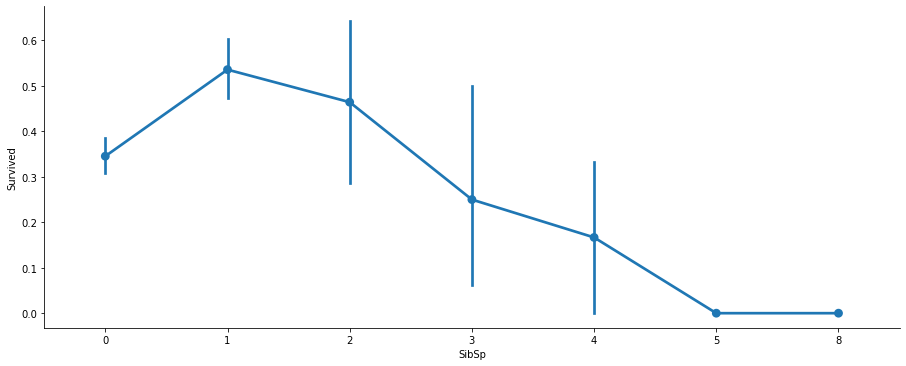

/Users/macintosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


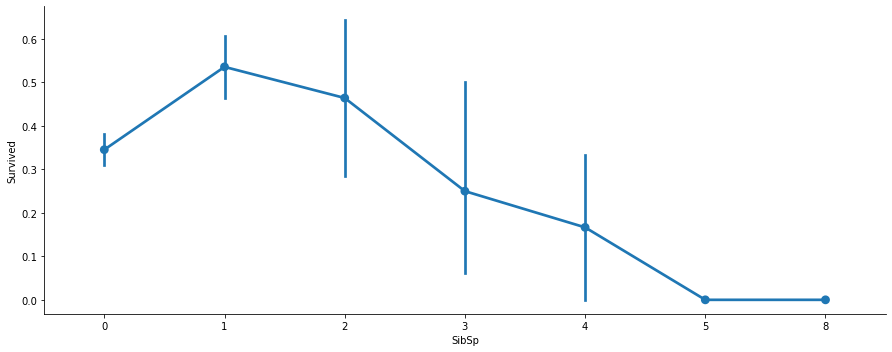

In [66]:
sns.factorplot(x ='SibSp', y ='Survived', data = train_data, aspect = 2.5)

2) sns.facetgrid와 sns.histplot을 통해서 밑에와 같은 그래프 만들기 (링크 참고 https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)
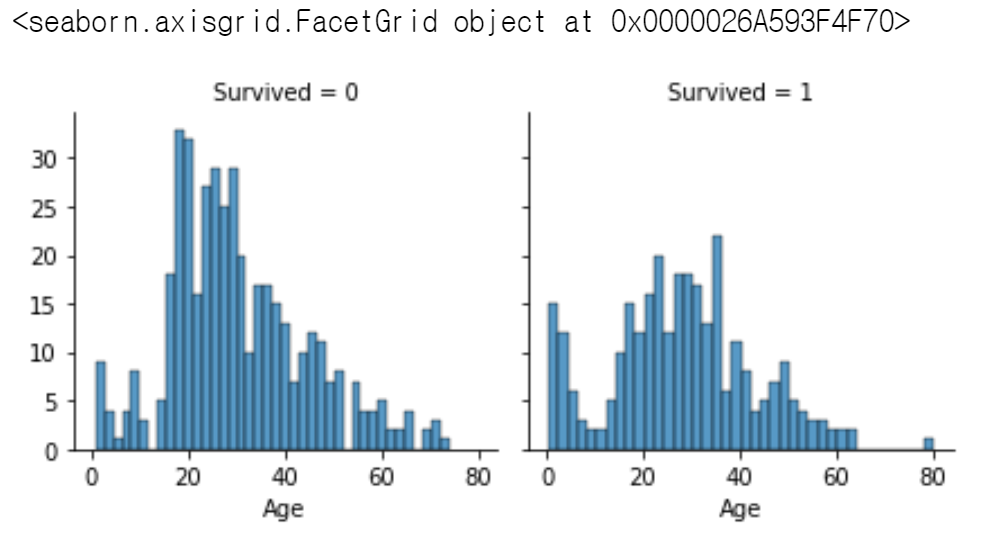

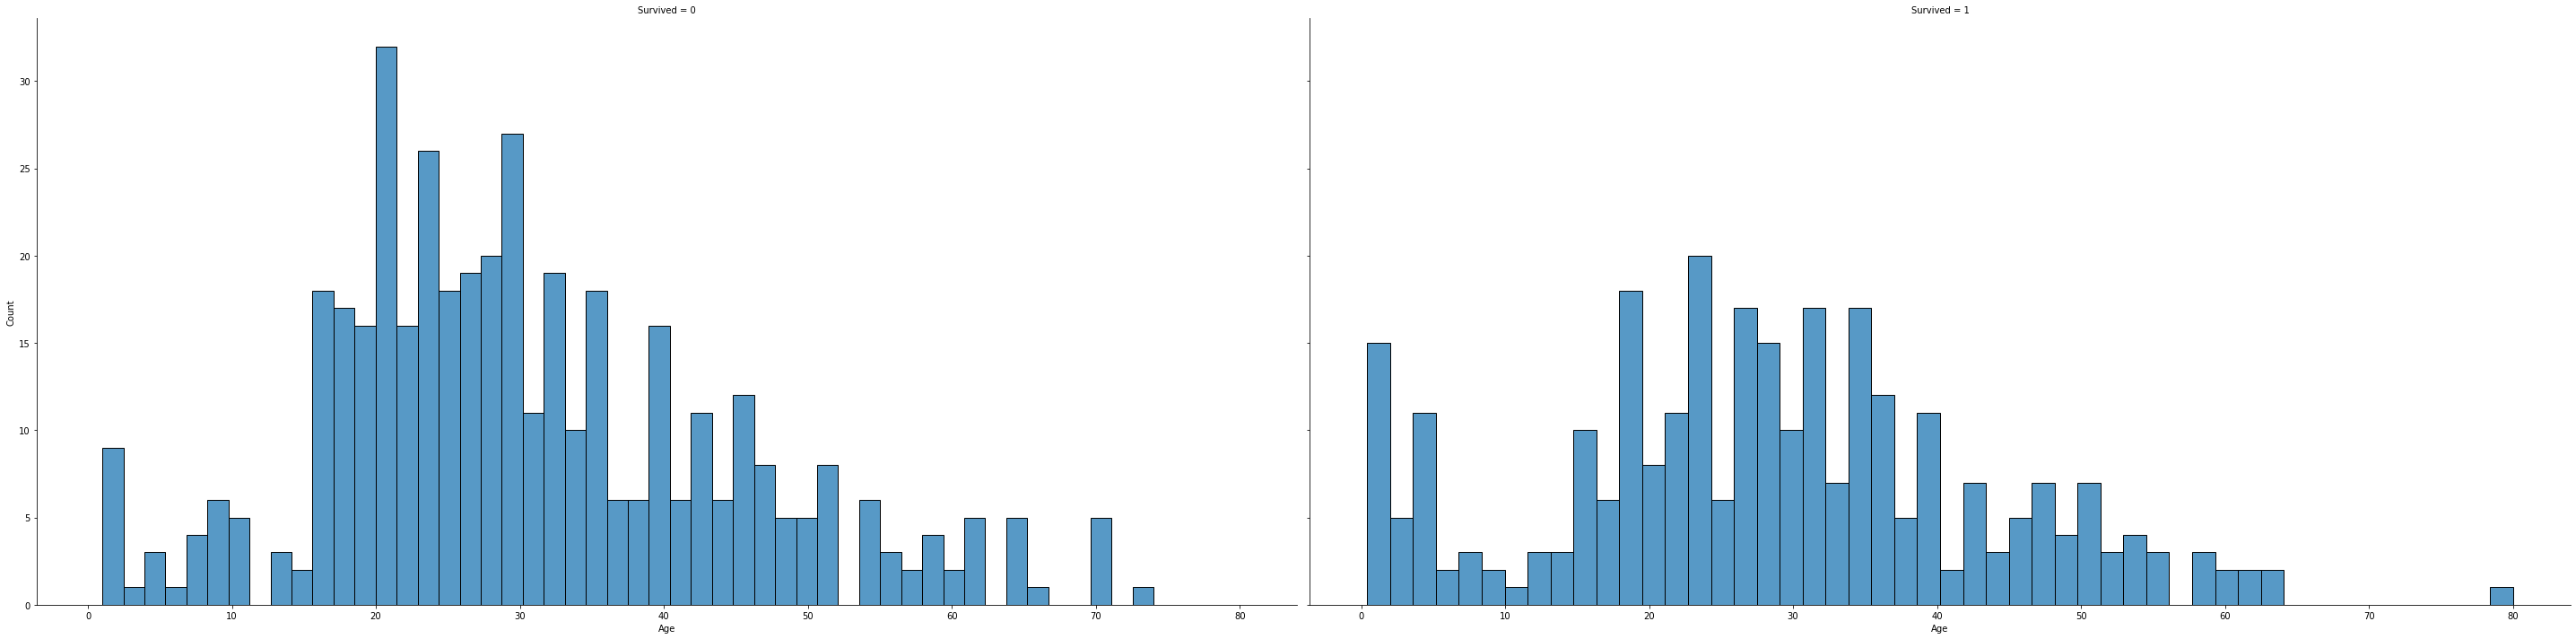

In [80]:
df = sns.FacetGrid(train_data, col="Survived", height=10, aspect=2)
df.map(sns.histplot, "Age", bins = 50)